In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [10]:
vacc_url = 'https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/vaccinations.csv'
vacc = pd.read_csv(vacc_url)

In [11]:
vacc['date'] = pd.to_datetime(vacc['date'])

In [12]:
cases_url = 'https://github.com/owid/covid-19-data/raw/master/public/data/jhu/total_cases.csv'
cases = pd.read_csv(cases_url)

In [13]:
cases_long = cases_df.melt(id_vars='date', var_name='location', value_name='total_cases')
cases_long['date'] = pd.to_datetime(cases_long['date'])

In [14]:
vacc.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


In [16]:
cases.head()

,date,World,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
0,2020-01-22,557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,657.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,2020-01-24,944.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
3,2020-01-25,1437.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
4,2020-01-26,2120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [18]:
df = pd.merge(vacc, cases_long, on=['location', 'date'], how='inner')

In [19]:
country = 'India'
df_country = df[df['location'] == country].sort_values('date')

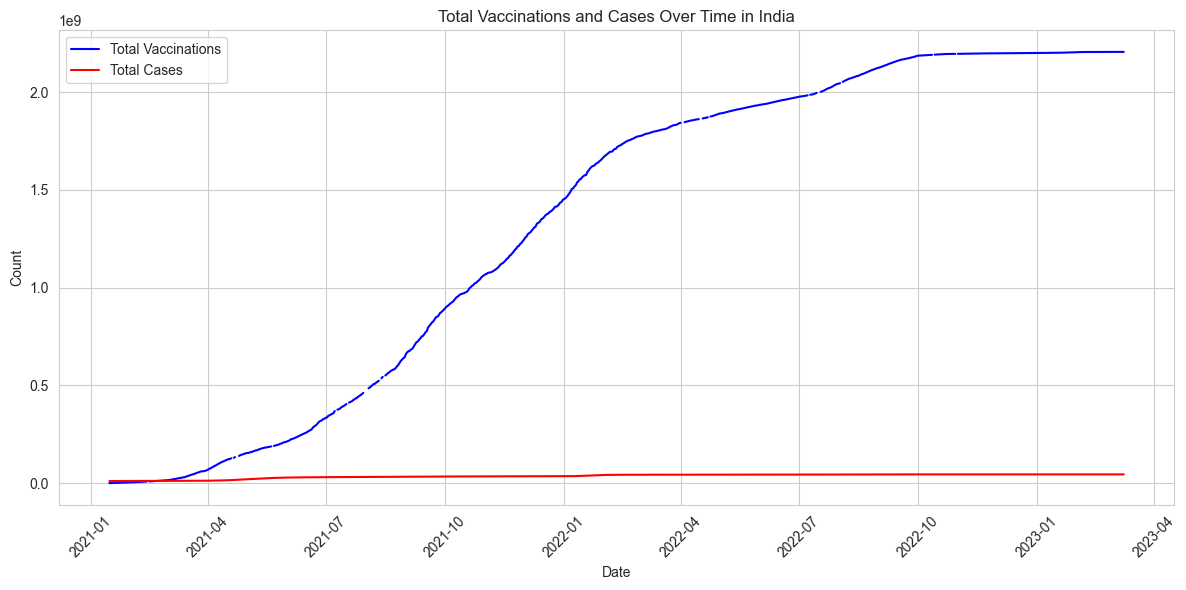

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df_country['date'], df_country['total_vaccinations'], label='Total Vaccinations', color='blue')
plt.plot(df_country['date'], df_country['total_cases'], label='Total Cases', color='red')
plt.title(f"Total Vaccinations and Cases Over Time in {country}")
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Harsh\AppData\Local\Temp\ipykernel_8072\2816741230.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  latest_vacc = vacc_df.groupby('location').apply(lambda x: x.loc[x['date'].idxmax()])
C:\Users\Harsh\AppData\Local\Temp\ipykernel_8072\2816741230.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_vaccinations', y='location', data=top10, palette='viridis')


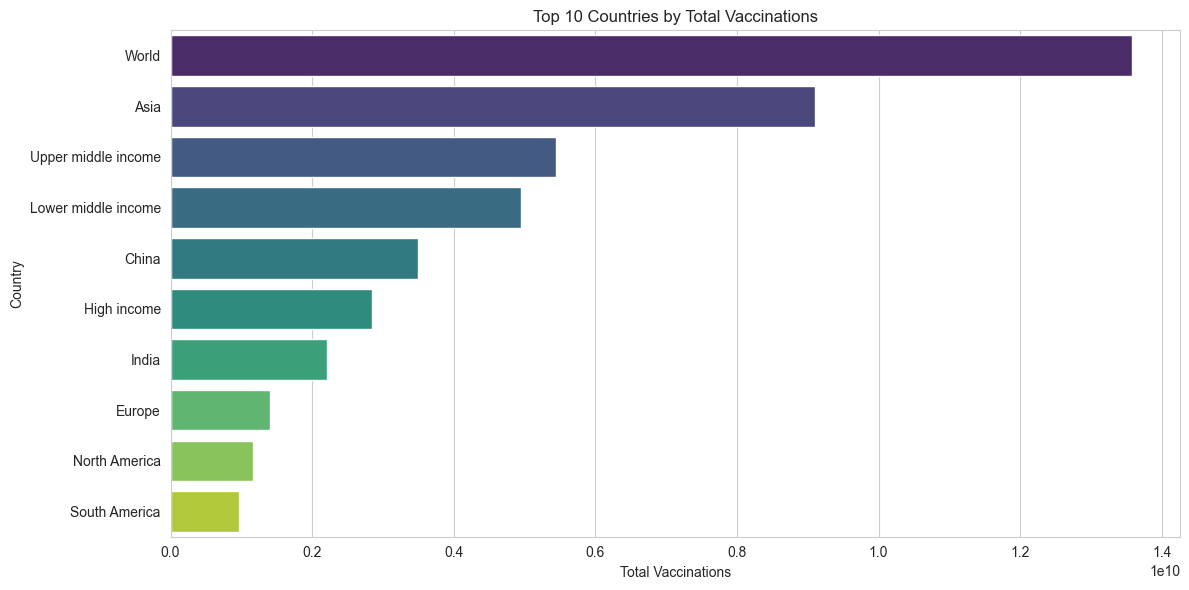

In [22]:
latest_vacc = vacc_df.groupby('location').apply(lambda x: x.loc[x['date'].idxmax()])
top10 = latest_vacc.sort_values('total_vaccinations', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='total_vaccinations', y='location', data=top10, palette='viridis')
plt.title('Top 10 Countries by Total Vaccinations')
plt.xlabel('Total Vaccinations')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

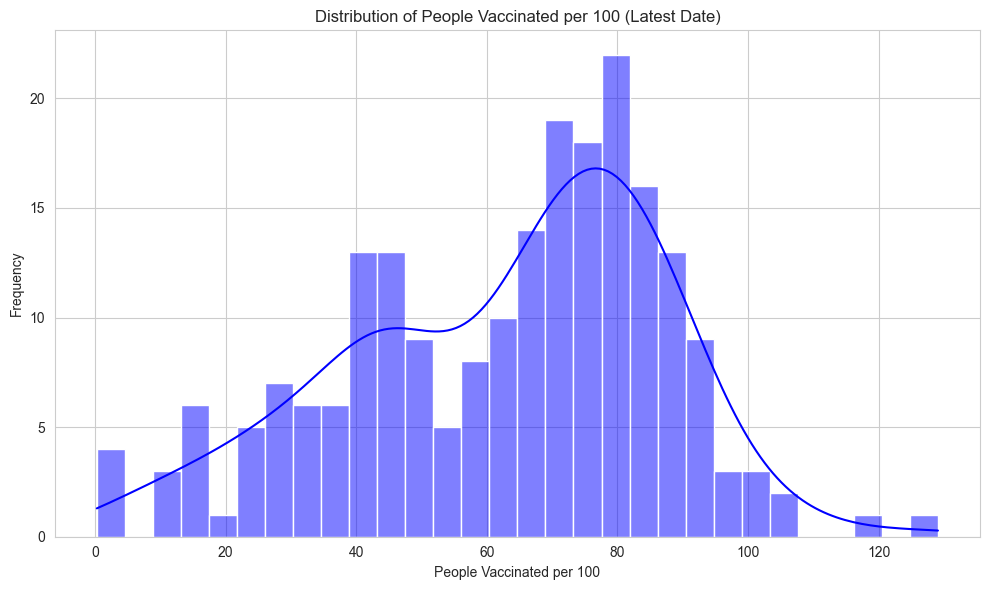

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(latest_vacc['people_vaccinated_per_hundred'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of People Vaccinated per 100 (Latest Date)')
plt.xlabel('People Vaccinated per 100')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [24]:
corr_cols = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations', 'total_cases']
corr_df = df[corr_cols].dropna()
corr_matrix = corr_df.corr()

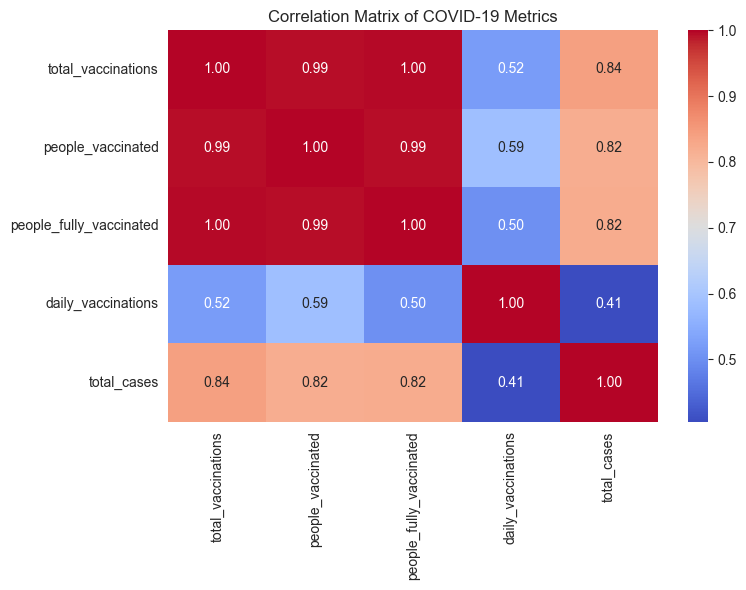

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of COVID-19 Metrics')
plt.tight_layout()
plt.show()